# Introduccion
El  notebook se basa en un desafio de kaggle que consta en predecir el precio de una vivienda a partir de sus caracteristicas, el df cuenta con 79 caracteristicas propias de cada vivienda. 

## Import Data

In [26]:
url_train='https://raw.githubusercontent.com/AleBoattini/DATASET/main/inmobiliaria_train.csv'
url_test='https://raw.githubusercontent.com/AleBoattini/DATASET/main/inmobiliaria_test.csv'

In [27]:
import pandas as pd
import numpy as np
import missingno as msno


In [28]:
df_train=pd.read_csv(url_train, index_col='Id')
df_test=pd.read_csv(url_test, index_col='Id')

In [29]:
i_max=df_train.index.max()
i_min=df_test.index.min()

print(max,' ', min)

<built-in function max>   <built-in function min>


In [30]:
df=pd.concat([df_train, df_test], axis=0)

## EDA
En general la etapa de EDA involucra un analisis de las variables y su comportamiento

Por el gran volumen de variables nos enfocaremos en buscar unicamente las columnas con valores nulos y ver como resolverlas para el correcto analisis.

In [31]:
null_columns=df.columns[df.isnull().any()]
null=df[null_columns].isnull().sum().sort_values()
print('Lista de variables con valores nulos:\n\n',null)

Lista de variables con valores nulos:

 Electrical         1
GarageArea         1
GarageCars         1
Exterior1st        1
Exterior2nd        1
KitchenQual        1
SaleType           1
TotalBsmtSF        1
BsmtFinSF1         1
BsmtUnfSF          1
BsmtFinSF2         1
Utilities          2
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
MSZoning           4
MasVnrArea        23
MasVnrType        24
BsmtFinType1      79
BsmtFinType2      80
BsmtQual          81
BsmtExposure      82
BsmtCond          82
GarageType       157
GarageCond       159
GarageQual       159
GarageFinish     159
GarageYrBlt      159
LotFrontage      486
FireplaceQu     1420
SalePrice       1459
Fence           2348
Alley           2721
MiscFeature     2814
PoolQC          2909
dtype: int64


Grafica realizada con misigno para ver representada la lista de valores nulos:

<AxesSubplot:>

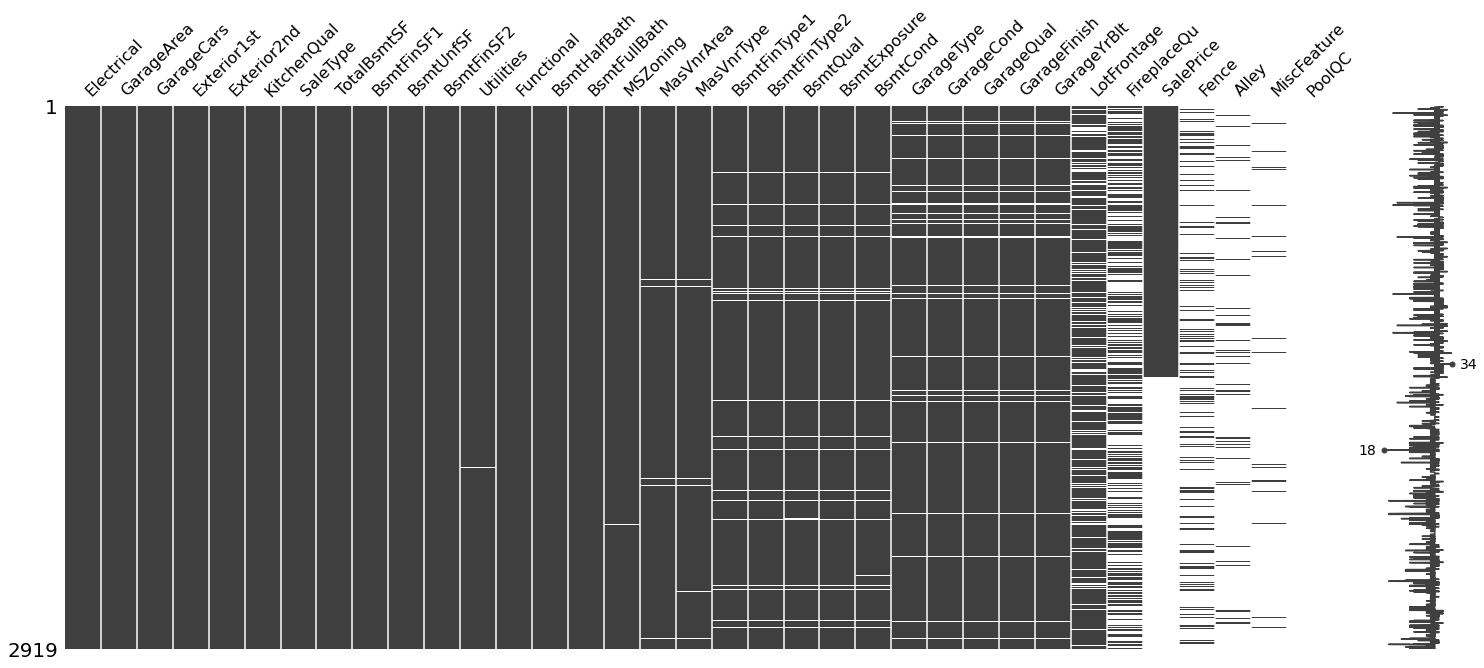

In [32]:
msno.matrix(df[null.index])


Separamos las columnas con valores nulos mayores al 80% de las entradas por un lado y las menores por el otro. Esto es porque a mayores faltantes de datos es mas inexacta la estimacion si queremos rellenarlos.

In [33]:
#TRAIN
null_per=(null/df.shape[0])<0.8

lista_1=null[null_per==True].index
lista_2=null[null_per==False].index

### Variables con nulos <80% 

Observamos que tipos de informacion tienen cargadas las columnas:

In [34]:
#Columnas con valores nulos menores al 80% del dataframe
df[lista_1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Electrical    2918 non-null   object 
 1   GarageArea    2918 non-null   float64
 2   GarageCars    2918 non-null   float64
 3   Exterior1st   2918 non-null   object 
 4   Exterior2nd   2918 non-null   object 
 5   KitchenQual   2918 non-null   object 
 6   SaleType      2918 non-null   object 
 7   TotalBsmtSF   2918 non-null   float64
 8   BsmtFinSF1    2918 non-null   float64
 9   BsmtUnfSF     2918 non-null   float64
 10  BsmtFinSF2    2918 non-null   float64
 11  Utilities     2917 non-null   object 
 12  Functional    2917 non-null   object 
 13  BsmtHalfBath  2917 non-null   float64
 14  BsmtFullBath  2917 non-null   float64
 15  MSZoning      2915 non-null   object 
 16  MasVnrArea    2896 non-null   float64
 17  MasVnrType    2895 non-null   object 
 18  BsmtFinType1  2840 non-null 

EL motivo de haber realizo los rellenos de forma individual es que en varias variables el valor nulo daba informacion, no la omitia:

In [35]:
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace=True)
df['BsmtQual'].fillna('Does not have', inplace=True)
df['BsmtCond'].fillna('Does not have', inplace=True)
df['BsmtFinType1'].fillna('Does not have', inplace=True)
df['BsmtExposure'].fillna('Does not have', inplace=True)
df['BsmtFinType2'].fillna('Does not have', inplace=True)
df['GarageCond'].fillna('Does not have', inplace=True)
df['GarageQual'].fillna('Does not have', inplace=True)
df['GarageFinish'].fillna('Does not have', inplace=True)
df['GarageType'].fillna('Does not have', inplace=True)
df['FireplaceQu'].fillna('Does not have', inplace=True)


Rellenamos las variables de tipo numerica con el promedio de igual forma que las anteriores:

In [36]:
lista1_float=df[lista_1].select_dtypes(include=['float64']).columns

In [37]:
for i in lista1_float:
  media=df[i].mean()
  df[i].fillna(media, inplace=True)

### Variables con nulos >80%

In [38]:
print(lista_2)

Index(['Fence', 'Alley', 'MiscFeature', 'PoolQC'], dtype='object')




*   Alley: Representa si el suelo es de grava o pavimentado (los valores nulos  representan la falta de informacion)

*   PoolQC: Representa la calidad de la piscina (los valores es xq no tienen piscina)

*   Fence: Representa la calidad de la valla (nulos = sin valla)

*   MiscFeature: Caracteristica extra no mencionada anteriormente



Con esta informacion asumimos borrar la variable 'Alley' y a las otras rellenar los nulos con una nuevo dato que lo represente

In [39]:
df.drop('Alley', axis=1, inplace=True)
df['PoolQC'].fillna('Does not have', inplace=True)
df['Fence'].fillna('Does not have', inplace=True)
df['MiscFeature'].fillna('Does not have', inplace=True)

### Variables categoricas a numeros
Para poder aplicar modelos de ML sin mayores problemas debemos hacer que todas las variables categoricas sean un valor numerico.
Una forma es usar la funcion get_dummies() pero la misma crea una nueva variable binaria por cada variable categorica, por lo que el df pasara a tener al menos 300 columnas luego de aplicar esta tecnica. 
Por otro lado existe la funcion de labelencoder de Sklearn que nos permite cambiar la categoria por un valor numerico. Probaremos esta ultima forma y veremos el comportamiento. 

In [40]:
variables_objetc=df.select_dtypes(include=['object']).columns

In [41]:
from sklearn.preprocessing import LabelEncoder
df_norm=df.copy()
for i in variables_objetc:
  le = LabelEncoder().fit(df[i])
  name=i + '_encoder'
  df_norm[name]=le.transform(df[i])

In [42]:
df_norm=df_norm.drop(variables_objetc, axis=1)

In [43]:
df_norm.sample(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType_encoder,GarageFinish_encoder,GarageQual_encoder,GarageCond_encoder,PavedDrive_encoder,PoolQC_encoder,Fence_encoder,MiscFeature_encoder,SaleType_encoder,SaleCondition_encoder
Id,,,,,,,,,,,,,,,,,,,,,
37,20,112.0,10859,5,5,1994,1995,0.0,0.0,0.0,...,1,3,5,5,2,0,0,0,8,4
1383,70,60.0,7200,7,7,1920,1950,0.0,0.0,0.0,...,5,3,5,5,0,0,0,0,8,4


In [44]:
df_train = df_norm.iloc[:len(df_train)]
df_test = df_norm.iloc[len(df_train):]
df_test.drop(['SalePrice'],axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Modelo de prediccion
Podemos probar varios modelos en esta ocacion y ver cual se ajusta mejor

In [45]:
# Separación de variables independientes y dependiente
X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']

In [57]:
# Importación de librerías
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor



# División de los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

# Aplicación de los modelos
models = {'Árbol de decisión': DecisionTreeRegressor(random_state=412),
          'Regresión Lineal': LinearRegression(),
          'SVM': SVR(),
          'Random Forest': RandomForestRegressor(random_state=412), 
          'KNN': KNeighborsClassifier(),
          'GBR': GradientBoostingRegressor(n_estimators=100, random_state=412),
          'ABR': AdaBoostRegressor(n_estimators=100, random_state=412)}

mse_list = []
r2_list = []

for name, model in models.items():
    # Entrenamiento del modelo
    model.fit(X_train, y_train)
    
    # Predicción del conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Cálculo del error cuadrático medio y del coeficiente de determinación
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Añadir los valores a las listas
    mse_list.append(mse)
    r2_list.append(r2)
    
# Creación de la tabla de comparación
table = pd.DataFrame({'Modelo': list(models.keys()),
                      'Error cuadrático medio': mse_list,
                      'Coeficiente de determinacion': r2_list})
table.sort_values('Coeficiente de determinacion', ascending=False)


,Modelo,Error cuadrático medio,Coeficiente de determinacion
5,GBR,6.654852e+08,0.891719
3,Random Forest,7.073279e+08,0.884911
1,Regresión Lineal,8.380008e+08,0.863649
6,ABR,1.085543e+09,0.823372
0,Árbol de decisión,1.268369e+09,0.793624
4,KNN,4.934315e+09,0.197138
2,SVM,6.404581e+09,-0.042088


Vemos que los modelos que mejor se ajustan son el de Gradient Boost Regressor y el de Ramdom Forest.

# Prediccion y Entrega

In [58]:
GBR=GradientBoostingRegressor(n_estimators=100, random_state=412)
X=df_train.drop('SalePrice', axis=1)
y=df_train['SalePrice']

GBR.fit(X,y)

SalePrice=GBR.predict(df_test)

In [60]:
df_test['SalePrice']=SalePrice
df_test['SalePrice']

<ipython-input-60-77e7e8eda3d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['SalePrice']=SalePrice


Id
1461    123655.908523
1462    163226.121226
1463    177552.245794
1464    178119.898535
1465    196093.490399
            ...      
2915     82847.135843
2916     80991.102622
2917    160118.169410
2918    116966.378253
2919    239160.470799
Name: SalePrice, Length: 1459, dtype: float64

In [61]:
Entrega=df_test['SalePrice']
Entrega.to_csv('SalePrice.csv', mode='a', header=True, index=True)